# FlameStream workers scalability comparision

In [1]:
require(data.table)

Loading required package: data.table


In [8]:
fs.10w <- tail(scan("fs-10w-3.data", sep = ","), -200) / 1e6
fs.7w.old <- tail(scan("old-data/fs-5w.data", sep = ","), -200) / 1e6
fs.10w.1 <- tail(scan("fs-10w-2.data", sep = ","), -200) / 1e6
fl.10w <- tail(scan("fl-10w.data", sep = ","), -200) / 1e6

In [9]:
summary(fs.10w)
summary(fs.7w.old)
summary(fs.10w.1)
summary(fl.10w)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.594   15.769   40.516   81.073  108.005 1171.613 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   4.591   23.946   30.524   43.746   45.306 1844.805 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.463  30.433  78.602 133.428 181.559 896.572 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.271  15.642  28.446  40.829  51.532 375.657 

In [10]:
quntiles.10000 <- seq(1, length(fs.10w)) / length(fs.10w)
quntiles.1000 <- seq(1, length(fl.10w)) / length(fl.10w)

In [11]:
quantile(fs.10w, p = 0.95)
quantile(fl.10w, p = 0.95)

95% 
282.0539

95% 
110.0975

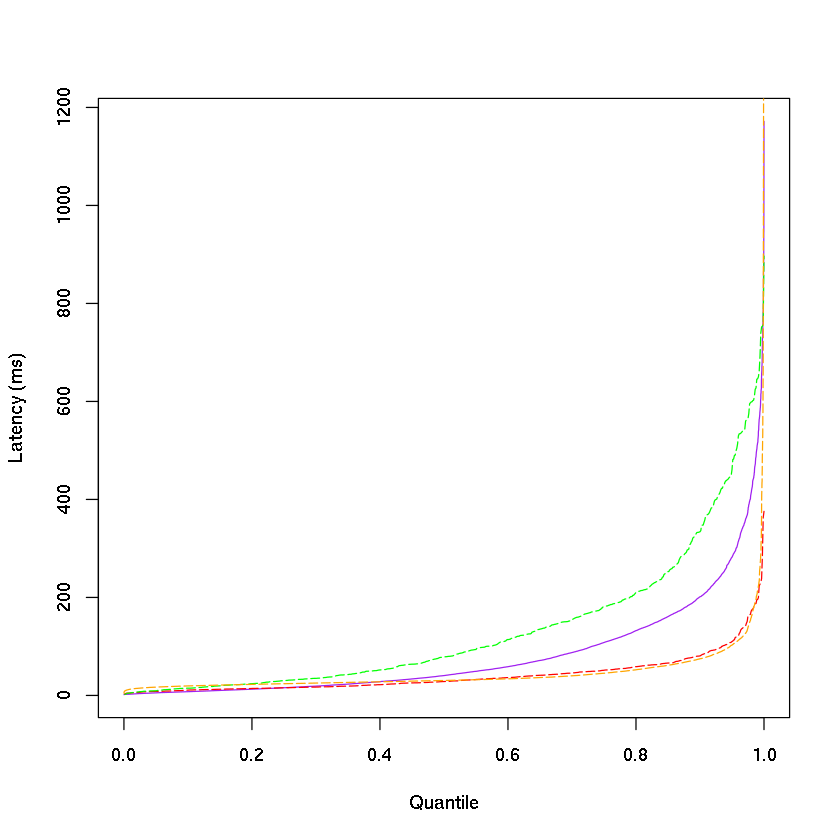

In [12]:
plot(quntiles.10000, sort(fs.10w), type = "l", col = "purple",  xlab = "Quantile", ylab = "Latency (ms)", lty=1)
lines(quntiles.1000, sort(fl.10w), col = "red", lty=5)
lines(quntiles.1000, sort(fs.10w.1), col = "green", lty=5)
lines(quntiles.10000, sort(fs.7w.old), col = "orange", lty=5)
#legend(0.52, 5.5e1, title = "FlameStream", 
#      legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
#       col = c("purple", "blue", "green", "orange", "red"), 
#       lty=c(1, 2, 3, 4 ,5))

In [47]:
m <- matrix(c(quantile(fs.10w, p = 0.5),
        quantile(fs.10w, p = 0.95) - quantile(fs.10w, p = 0.5),
        quantile(fs.10w, p = 0.99) - quantile(fs.10w, p = 0.95),
        quantile(fl.10w, p = 0.5),
        quantile(fl.10w, p = 0.95) - quantile(fl.10w, p = 0.5),
        quantile(fl.10w, p = 0.99) - quantile(fl.10w, p = 0.95)), nrow=3)
colnames(m) <- c("FlameStream", "Flink")
rownames(m) <- c("50%", "95%", "99%")
m

,FlameStream,Flink
50%,40.51565,28.44613
95%,241.53822,81.65134
99%,233.41235,85.73606


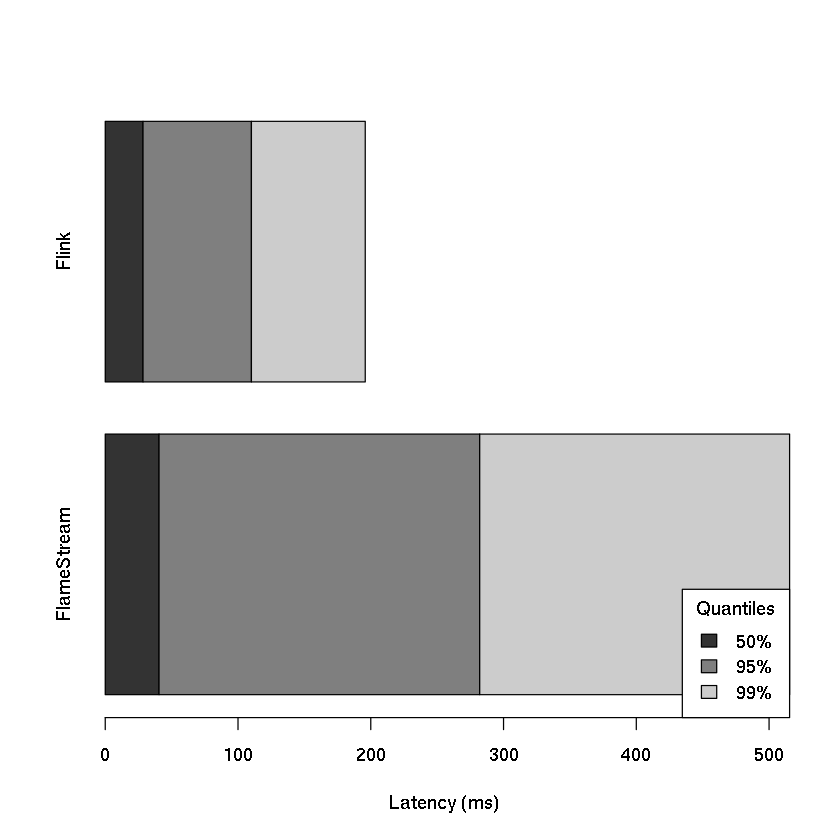

In [48]:
barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
legend("bottomright",
       title = "Quantiles",
       legend = c("50%", "95%", "99%"), 
       fill = c("grey20", "grey50", "grey80"))